# Project 2

In [800]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as ss
plt.rcParams['figure.figsize'] = [20, 5]

In [712]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### CO2 from 800kyrs to present

In [713]:
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,2,])


In [714]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [715]:
co2df['year_co2'] = co2df['Gasage (yr BP)'].apply(lambda x: -x)

In [716]:
co2df['year_co2'] = co2df['year_co2'].astype(int)

In [717]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),year_co2
0,-51.03,368.02,0.06,51
1,-48.00,361.78,0.37,48
2,-46.28,359.65,0.10,46
3,-44.41,357.11,0.16,44
4,-43.08,353.95,0.04,43
...,...,...,...,...
1896,803925.28,202.92,2.06,-803925
1897,804009.87,207.50,0.92,-804009
1898,804522.67,204.86,1.64,-804522
1899,805132.44,202.23,0.69,-805132


[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

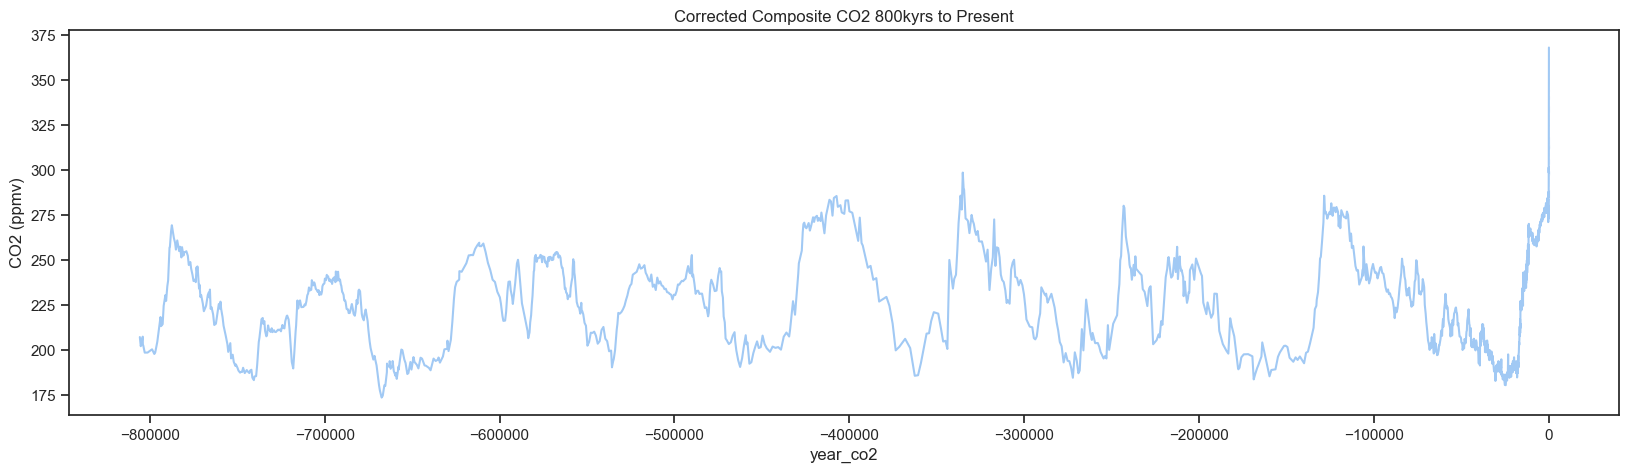

In [718]:
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)').set(title='Corrected Composite CO2 800kyrs to Present')

In [719]:
tempdf=pd.read_csv('temperaturedata.csv')

In [720]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [721]:
tempdf['year_temp'] = tempdf['EDC3béta'].apply(lambda x: -x)

In [722]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,year_temp
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,50.00000
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,43.55977
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,37.44019
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,31.64156
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,24.55278
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-816871.60000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-817693.60000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-818505.50000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-819303.10000


[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

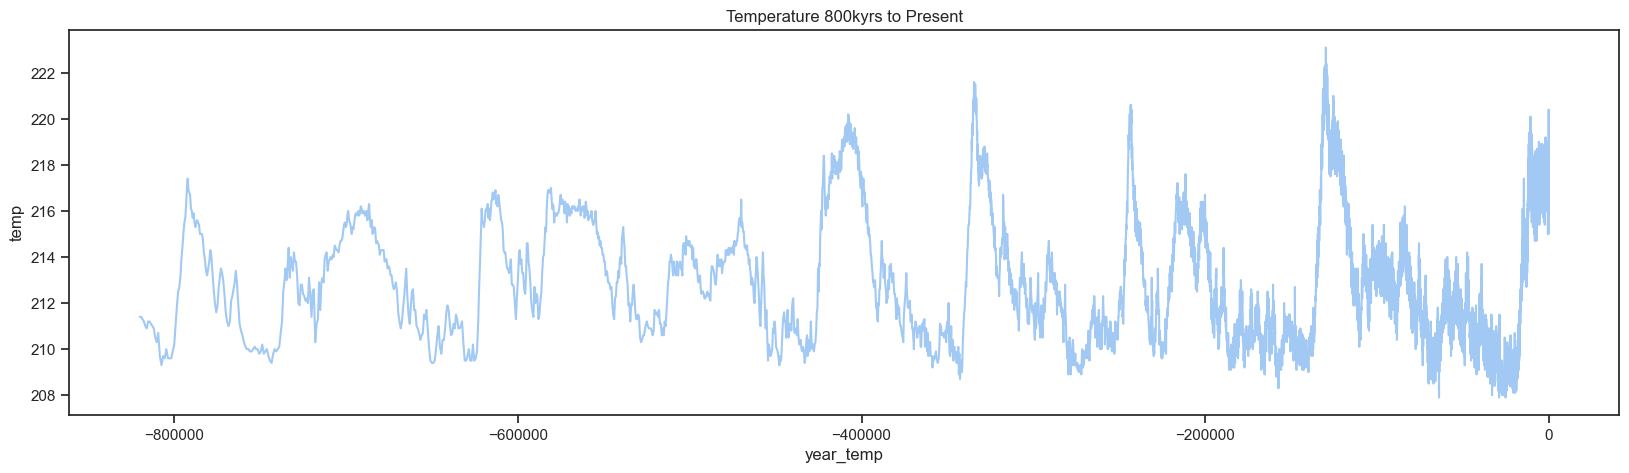

In [723]:
sns.lineplot(data=tempdf, x='year_temp', y='temp').set(title='Temperature 800kyrs to Present')


In [724]:
year_co2 = co2df[['year_co2','CO2 (ppmv)']]
year_temp = tempdf[['year_temp','temp']]

In [725]:
co2andtemp = pd.concat([year_co2, year_temp], axis =1)

In [726]:
co2andtemp

,year_co2,CO2 (ppmv),year_temp,temp
0,51.0,368.02,50.00000,218.3
1,48.0,361.78,43.55977,218.3
2,46.0,359.65,37.44019,218.3
3,44.0,357.11,31.64156,218.3
4,43.0,353.95,24.55278,218.3
...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0
5815,NaN,NaN,-817693.60000,211.2
5816,NaN,NaN,-818505.50000,211.3
5817,NaN,NaN,-819303.10000,211.4


In [727]:
co2andtemp.dtypes

year_co2      float64
CO2 (ppmv)    float64
year_temp     float64
temp          float64
dtype: object

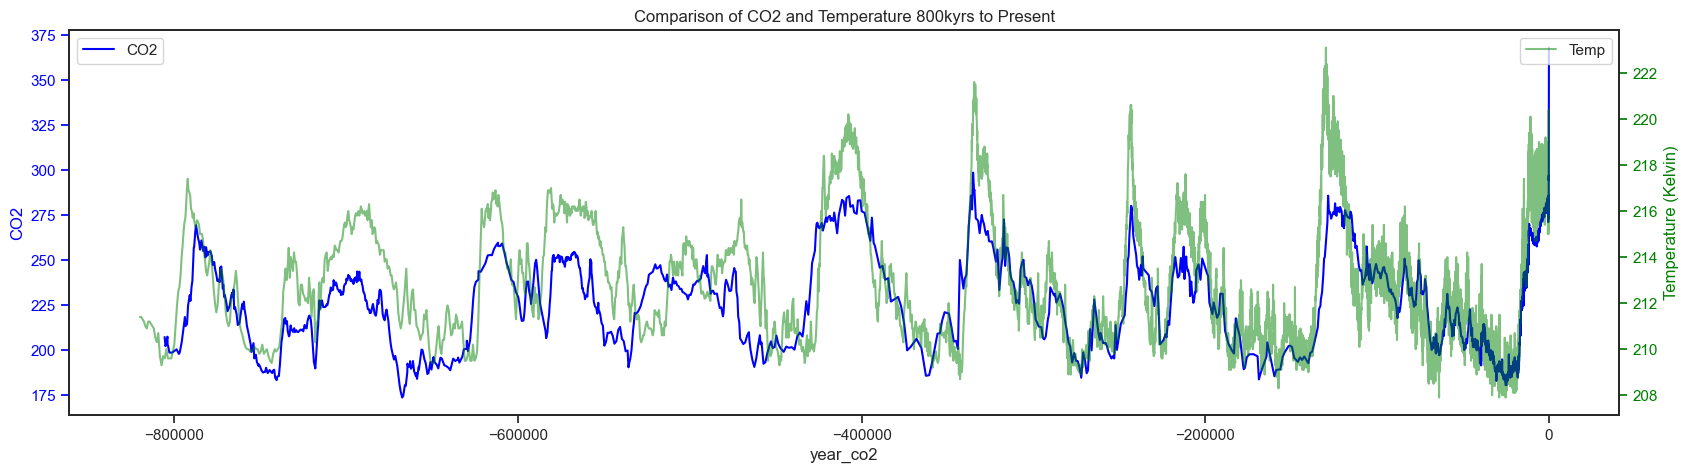

In [728]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot
plt.show()

In [729]:
# Read the content of the file
with open('Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  # Assuming columns are separated by spaces
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

In [730]:
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv')
ch4df

,Depth,GasAge,CH4mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [731]:
ch4df['year_CH4'] = ch4df['GasAge'].apply(lambda x: -x)

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

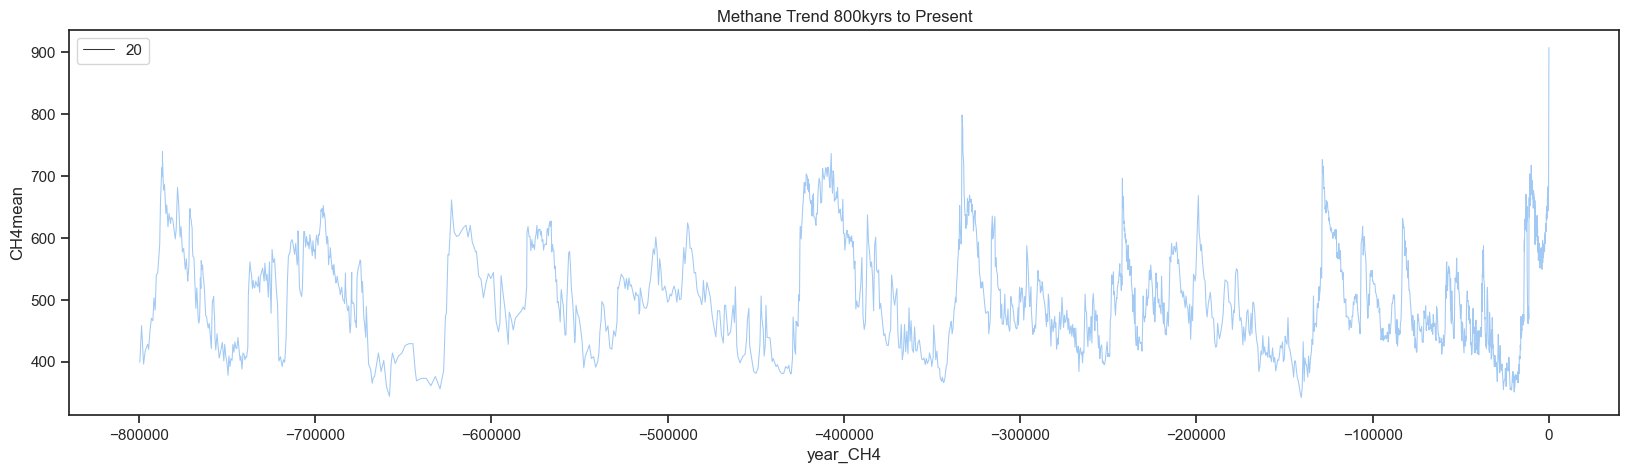

In [732]:
sns.lineplot(data=ch4df, x='year_CH4', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

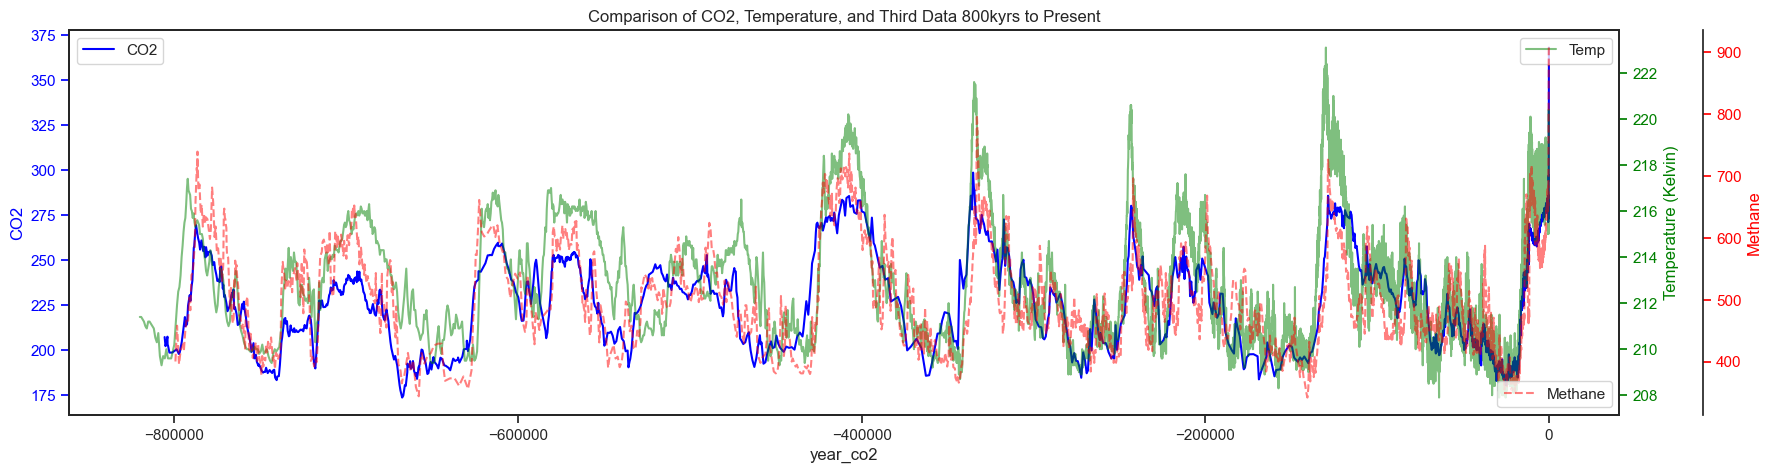

In [733]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['year_CH4'], ch4df['CH4mean'], label='Methane', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Third Data 800kyrs to Present')

# Display the plot
plt.show()

In [734]:
year_ch4 = ch4df[['GasAge','CH4mean']]

### Irish Data

Median monthly data from 1711 to 2016

In [735]:
ire_df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [736]:
ire_df['Date'] = pd.to_datetime(ire_df['Year'].astype(str) + ire_df['Month'].astype(str), format='%Y%m')

In [737]:
ire_df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


<Axes: xlabel='Date', ylabel='Median montly series'>

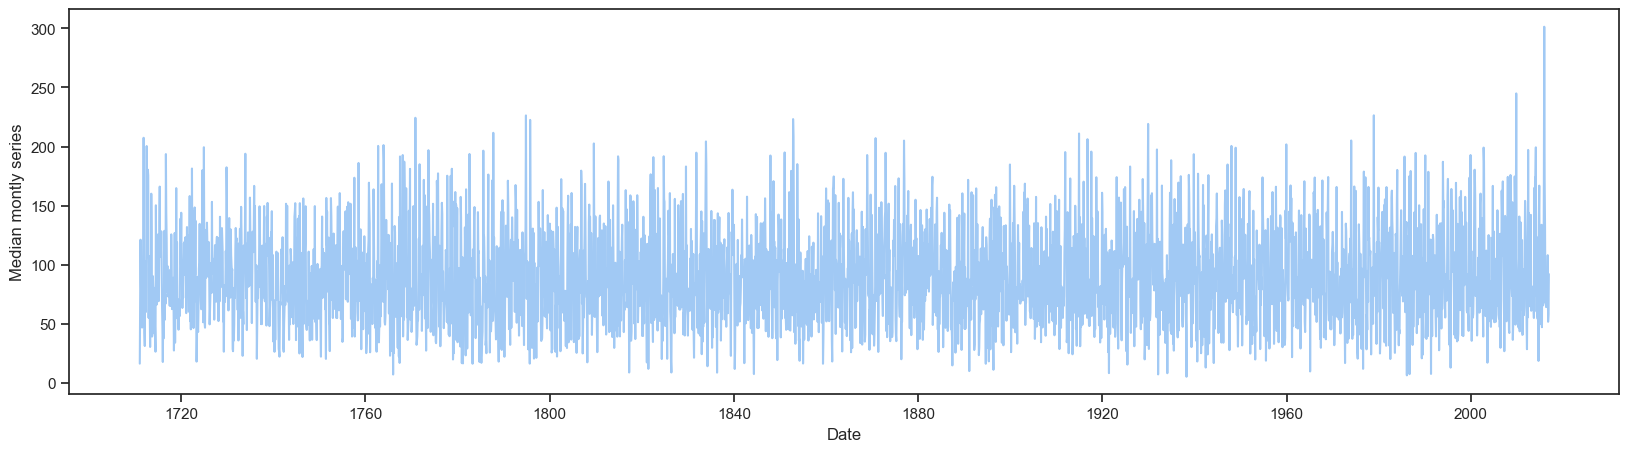

In [738]:
sns.lineplot(data=ire_df, x='Date', y='Median montly series' )

<Axes: ylabel='Median montly series'>

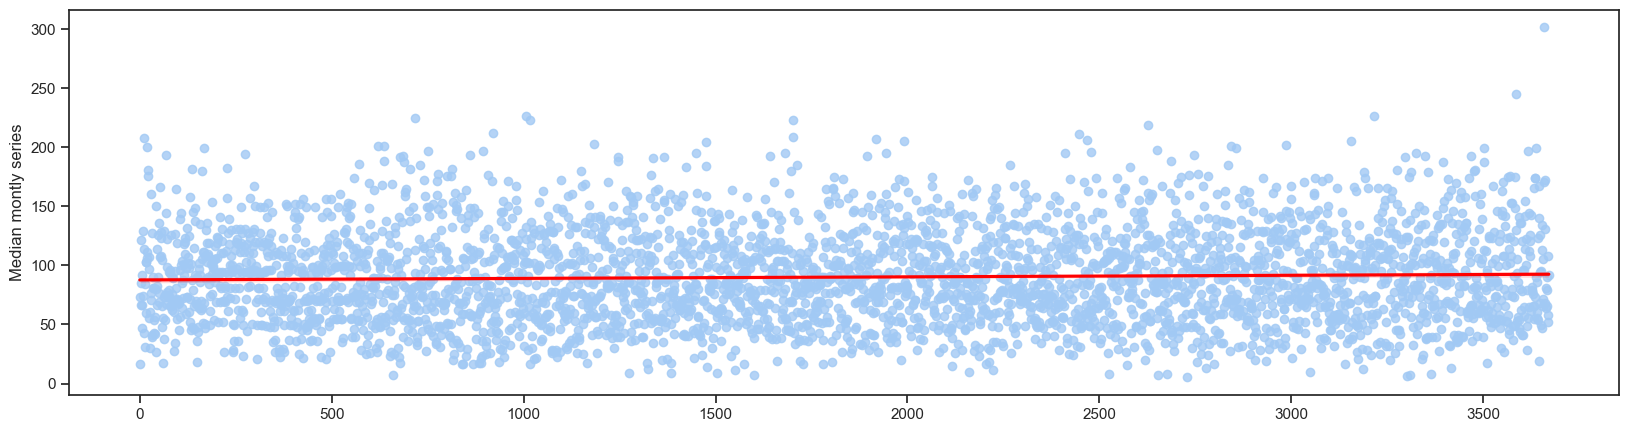

In [739]:
sns.regplot(x=ire_df.index, y="Median montly series", data=ire_df,  line_kws={"color": "red"})

In [740]:
mayo_rain_df=pd.read_csv('Mayo_Rainfall.csv', skiprows=19, usecols=[0,1,7,])

In [741]:
mayo_rain_df

,year,month,rain
0,1956,9,49.9
1,1956,10,98.8
2,1956,11,51.6
3,1956,12,180.6
4,1957,1,148.5
...,...,...,...
797,2023,7,148.5
798,2023,8,117.2
799,2023,9,77.2
800,2023,10,100.0


In [742]:
mayo_rain_df['mayo_date'] = pd.to_datetime(mayo_rain_df['year'].astype(str) + mayo_rain_df['month'].astype(str), format='%Y%m')

In [743]:
mayo_rain_df['mayo_rain'] = mayo_rain_df['rain']

In [744]:
mayo_rain_df

,year,month,rain,mayo_date,mayo_rain
0,1956,9,49.9,1956-09-01,49.9
1,1956,10,98.8,1956-10-01,98.8
2,1956,11,51.6,1956-11-01,51.6
3,1956,12,180.6,1956-12-01,180.6
4,1957,1,148.5,1957-01-01,148.5
...,...,...,...,...,...
797,2023,7,148.5,2023-07-01,148.5
798,2023,8,117.2,2023-08-01,117.2
799,2023,9,77.2,2023-09-01,77.2
800,2023,10,100.0,2023-10-01,100.0


In [745]:
mayo = mayo_rain_df[['mayo_date','mayo_rain']].copy()

<Axes: xlabel='mayo_date', ylabel='mayo_rain'>

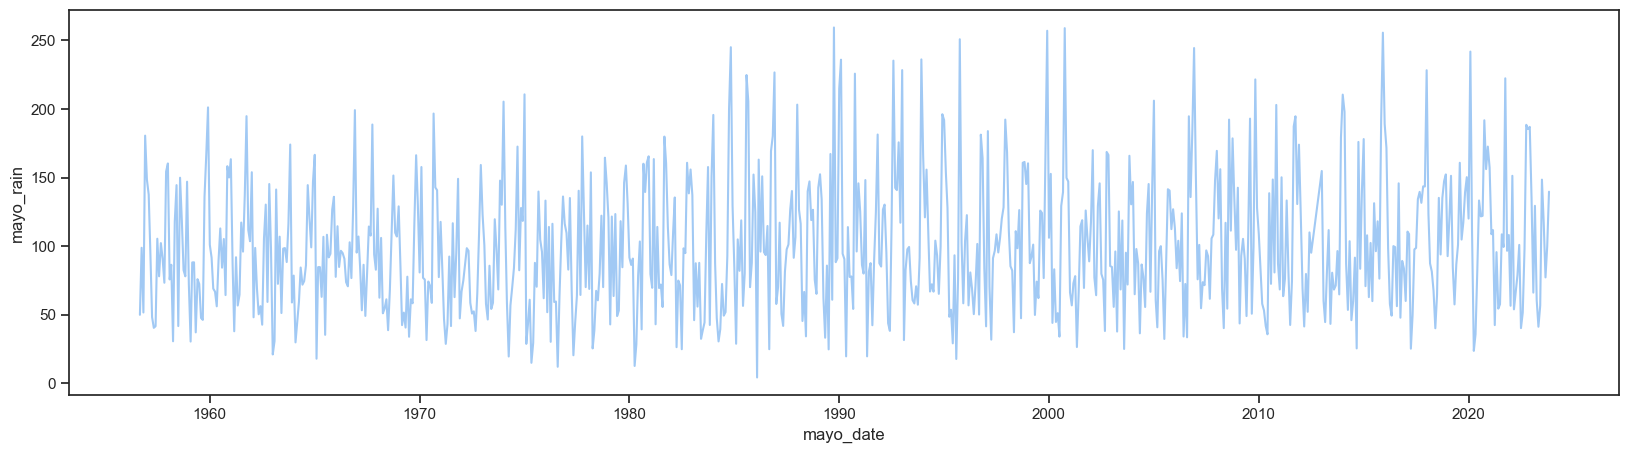

In [746]:
sns.lineplot(data=mayo, x='mayo_date', y='mayo_rain' )

<Axes: ylabel='mayo_rain'>

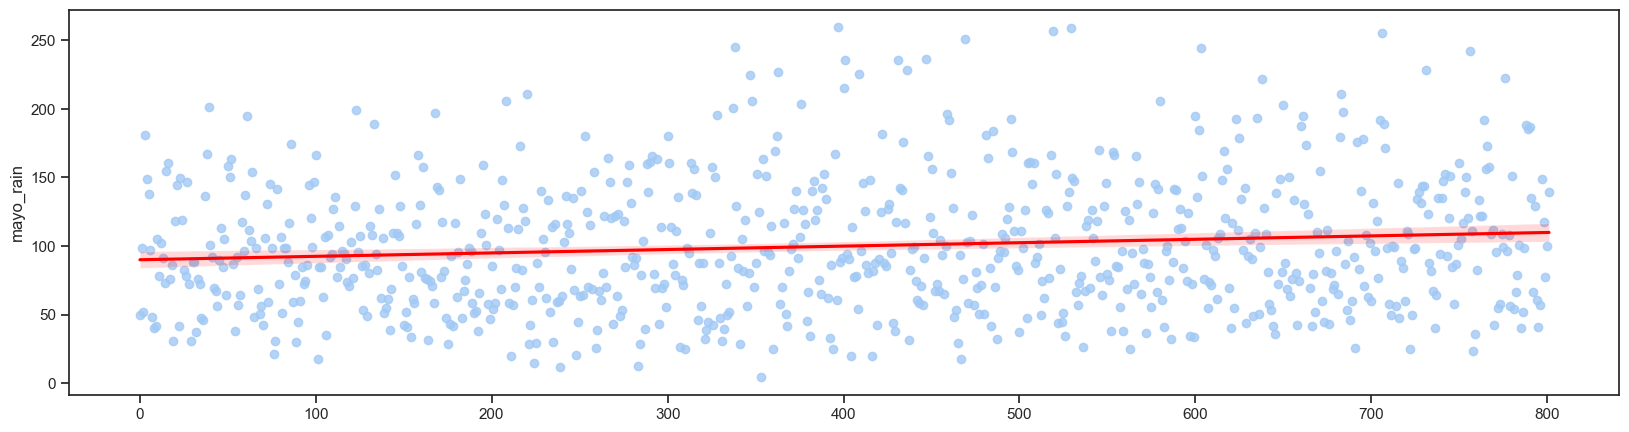

In [747]:
sns.regplot(x=mayo.index, y="mayo_rain", data=mayo, line_kws={"color": "red"})

In [748]:
wexford_rain_df=pd.read_csv('Wexford_Rainfall.csv', skiprows=13, usecols=[0,1,3])
wexford_rain_df['wex_date'] = pd.to_datetime(wexford_rain_df['year'].astype(str) + wexford_rain_df['month'].astype(str), format='%Y%m')
wexford_rain_df['wexford_rain'] = wexford_rain_df['rain']


In [749]:
wexford_rain_df 

,year,month,rain,wex_date,wexford_rain
0,1987,9,100.5,1987-09-01,100.5
1,1987,10,176.7,1987-10-01,176.7
2,1987,11,67.7,1987-11-01,67.7
3,1987,12,91.5,1987-12-01,91.5
4,1988,1,205.4,1988-01-01,205.4
...,...,...,...,...,...
425,2023,4,62.5,2023-04-01,62.5
426,2023,5,34.7,2023-05-01,34.7
427,2023,6,71.3,2023-06-01,71.3
428,2023,7,117.5,2023-07-01,117.5


In [750]:
wexford = wexford_rain_df[['wex_date','wexford_rain']].copy()

<Axes: xlabel='wex_date', ylabel='wexford_rain'>

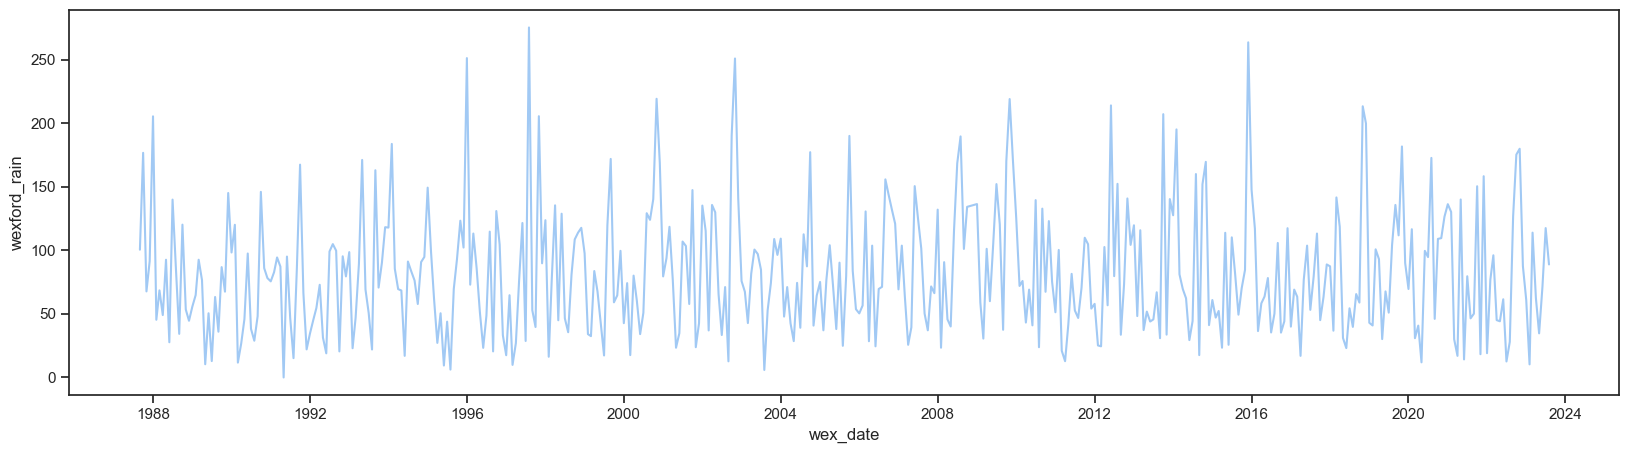

In [751]:
sns.lineplot(data=wexford, x="wex_date", y="wexford_rain")

<Axes: ylabel='rain'>

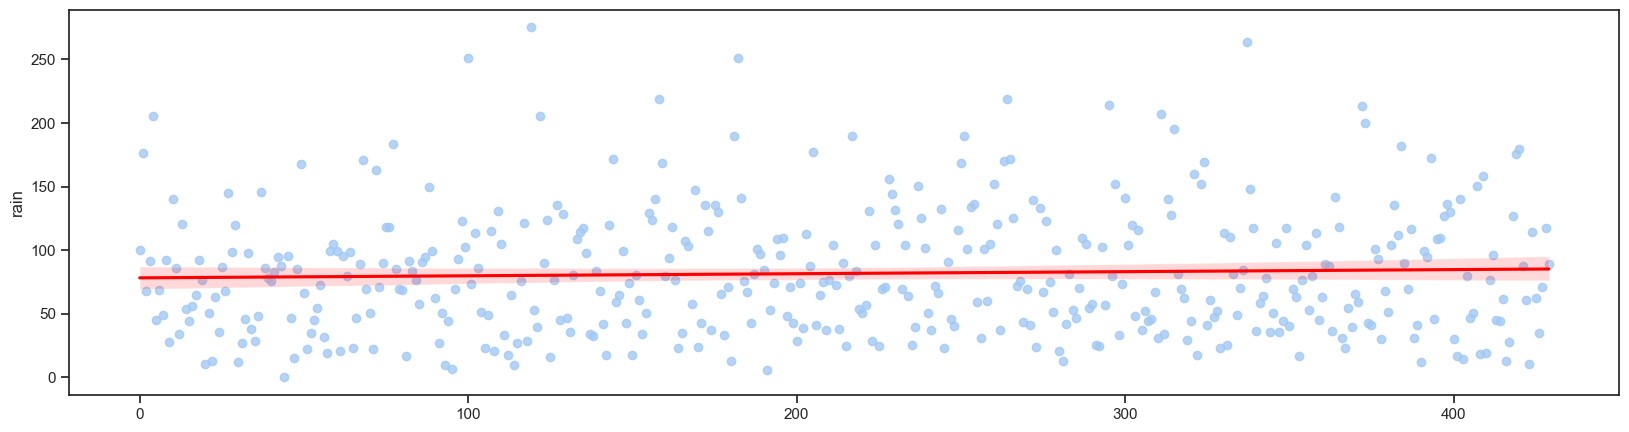

In [752]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, line_kws={"color": "red"})

### Combining Data Sets

In [753]:
ireland_rain_df = pd.concat([mayo, wexford], axis =1)

In [754]:
ireland_rain_df

,mayo_date,mayo_rain,wex_date,wexford_rain
0,1956-09-01,49.9,1987-09-01,100.5
1,1956-10-01,98.8,1987-10-01,176.7
2,1956-11-01,51.6,1987-11-01,67.7
3,1956-12-01,180.6,1987-12-01,91.5
4,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...
797,2023-07-01,148.5,NaT,NaN
798,2023-08-01,117.2,NaT,NaN
799,2023-09-01,77.2,NaT,NaN
800,2023-10-01,100.0,NaT,NaN


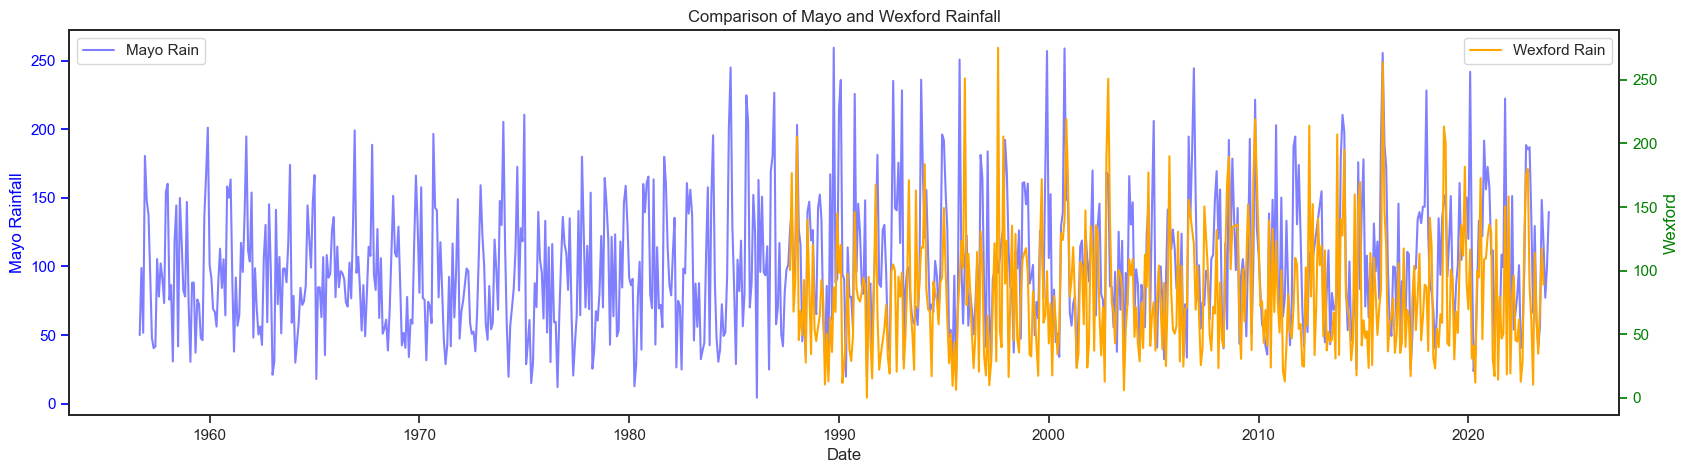

In [798]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(ireland_rain_df['mayo_date'], ireland_rain_df['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rainfall', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(ireland_rain_df['wex_date'], ireland_rain_df['wexford_rain'], label='Wexford Rain', color='orange')
ax2.set_ylabel('Wexford', color='green')
ax2.tick_params('y', colors='green')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall')

# Display the plot
plt.show()

In [769]:
reduced_mayo = mayo.iloc[372: ].reset_index(0)

In [770]:
reduced_mayo

,index,mayo_date,mayo_rain
0,372,1987-09-01,126.7
1,373,1987-10-01,140.2
2,374,1987-11-01,91.5
3,375,1987-12-01,106.6
4,376,1988-01-01,203.2
...,...,...,...
425,797,2023-07-01,148.5
426,798,2023-08-01,117.2
427,799,2023-09-01,77.2
428,800,2023-10-01,100.0


In [771]:
mayo_wex = pd.concat([reduced_mayo, wexford], axis =1)

In [772]:
mayo_wex

,index,mayo_date,mayo_rain,wex_date,wexford_rain
0,372,1987-09-01,126.7,1987-09-01,100.5
1,373,1987-10-01,140.2,1987-10-01,176.7
2,374,1987-11-01,91.5,1987-11-01,67.7
3,375,1987-12-01,106.6,1987-12-01,91.5
4,376,1988-01-01,203.2,1988-01-01,205.4
...,...,...,...,...,...
425,797,2023-07-01,148.5,2023-04-01,62.5
426,798,2023-08-01,117.2,2023-05-01,34.7
427,799,2023-09-01,77.2,2023-06-01,71.3
428,800,2023-10-01,100.0,2023-07-01,117.5


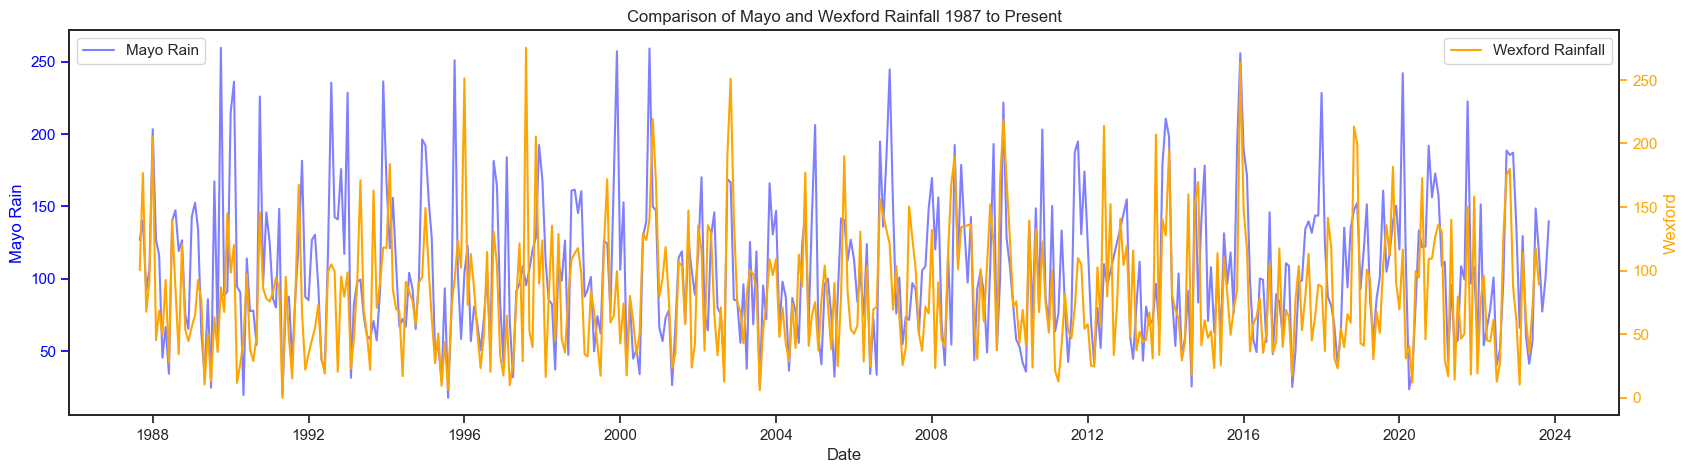

In [799]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(mayo_wex['mayo_date'], mayo_wex['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rain', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(mayo_wex['wex_date'], mayo_wex['wexford_rain'], label='Wexford Rainfall', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall 1987 to Present')

# Display the plot
plt.show()

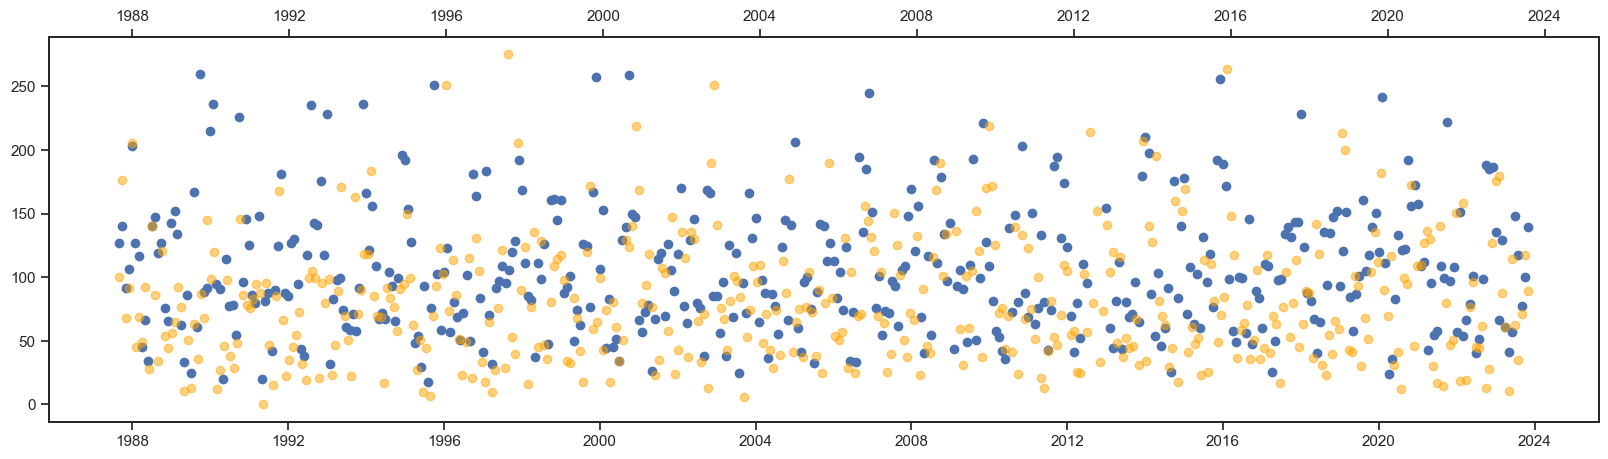

In [795]:
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter( mayo_wex['mayo_date'], mayo_wex['mayo_rain'])
ay.scatter(mayo_wex['wex_date'], mayo_wex['wexford_rain'],  color='orange', alpha = 0.5)
plt.show()

<Axes: ylabel='rain'>

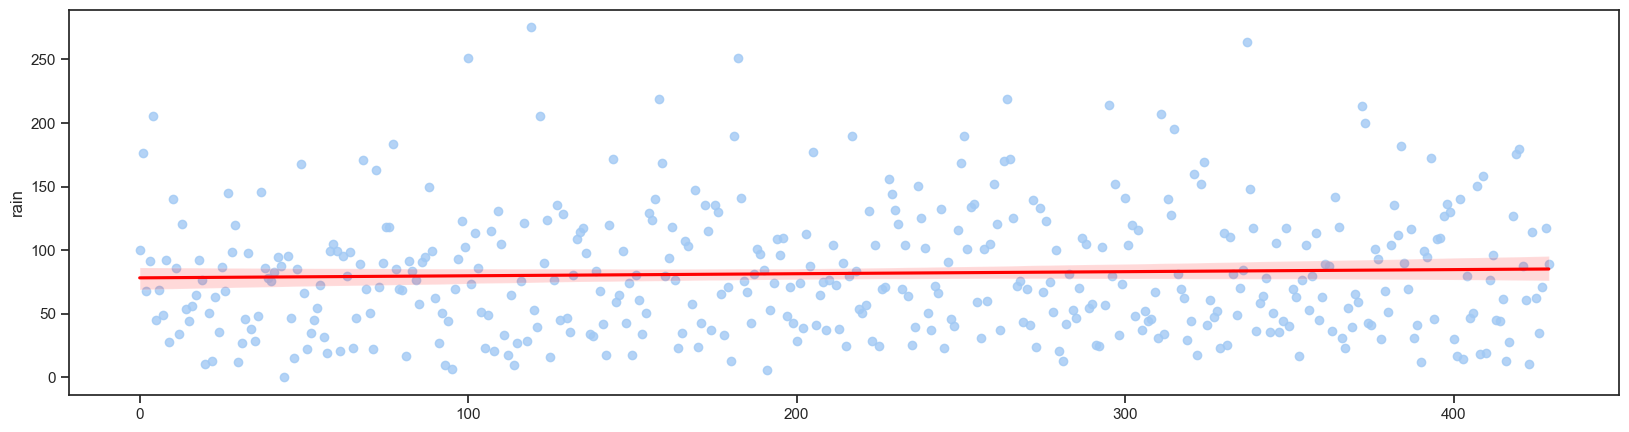

In [760]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, line_kws={"color": "red"})

In [761]:
combined = pd.concat([co2andtemp, year_ch4, ireland_rain_df], axis =1)

In [762]:
combined

,year_co2,CO2 (ppmv),year_temp,temp,GasAge,CH4mean,mayo_date,mayo_rain,wex_date,wexford_rain
0,51.0,368.02,50.00000,218.3,13.0,907.0,1956-09-01,49.9,1987-09-01,100.5
1,48.0,361.78,43.55977,218.3,126.0,784.0,1956-10-01,98.8,1987-10-01,176.7
2,46.0,359.65,37.44019,218.3,130.0,762.0,1956-11-01,51.6,1987-11-01,67.7
3,44.0,357.11,31.64156,218.3,151.0,710.0,1956-12-01,180.6,1987-12-01,91.5
4,43.0,353.95,24.55278,218.3,184.0,727.0,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0,NaN,NaN,NaT,NaN,NaT,NaN
5815,NaN,NaN,-817693.60000,211.2,NaN,NaN,NaT,NaN,NaT,NaN
5816,NaN,NaN,-818505.50000,211.3,NaN,NaN,NaT,NaN,NaT,NaN
5817,NaN,NaN,-819303.10000,211.4,NaN,NaN,NaT,NaN,NaT,NaN


In [763]:
combined.to_csv('combined_data.csv', index=False) 

In [764]:
combined.to_json('combined_data.json', orient='records') 

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff.  2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

[7] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023]. ‌

[8] Stack Overflow. (n.d.). python - How to make inline plots in Jupyter Notebook larger? [online] Available at: https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger. [Accessed 21 Dec. 2023]. 

‌

pandas.pydata.org. (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. [Accessed 21 Dec. 2023]. 

‌

Fusio.net. (2023). Available at: https://cli.fusio.net/cli/climate_data/webdata/mly2375.zip [Accessed 21 Dec. 2023].

‌

Nik (2023). Converting Pandas DataFrame Column from Object to Float • datagy. [online] datagy. Available at: https://datagy.io/pandas-convert-object-to-float/ [Accessed 22 Dec. 2023].

‌

Stack Overflow. (n.d.). python - Different colors for points and line in Seaborn regplot. [online] Available at: https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot.

‌

Stack Overflow. (n.d.). scatter plot with multiple X features and single Y in Python. [online] Available at: https://stackoverflow.com/questions/59140950/scatter-plot-with-multiple-x-features-and-single-y-in-python [Accessed 22 Dec. 2023].

‌